# DOPP Assignment 3

## Schedule

### Week 1, first iteration

- Explore: Amine, Satyam & Malbora

**Due Date**: 18.01.2021, 20:00

### Week 2, next iteration with the other dataset

Adding data and checking if the previous one is really answering our questions

**Meeting**: 18.01.2021, 20:00

- Get: 
- Explore: 
- Model: 
- Visualize:
- 2 pages PDF report: 
- Presentaion: 

**Due date**: 24.01.2021

## Todo

- Get: https://www.kaggle.com/stieranka/predicting-gdp-world-countries

- Do all data process based on the dataset


## Ask

- What percentage of the world population lives in extreme poverty? 

- Which characteristics are predictive for countries with large populations living in extreme poverty? 

- Which characteristics are predictive for populations emerging from extreme poverty?


## Get the Data



- Get: https://www.kaggle.com/stieranka/predicting-gdp-world-countries

## Explore the Data

In this dataset, we are exploring the dataset "Nations of the World" by Fernando Lasso. We will zero in on the components that influencing a nation's GDP for each capita and neediness and attempt to make a model utilizing the information of 227 nations from the dataset. I will likewise momentarily examine the absolute GDPs.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Clean the data

In [2]:
dataset = pd.read_csv('https://gist.githubusercontent.com/amboulouma/6cbd30ab138e7414e190025ef39af80d/raw/6bf61690e51176d82d2703fa5c39cd5ed106d15d/countries%2520of%2520the%2520world.csv', decimal=',',dtype={'Country':'string'})

### Missing Data

We saw that there are some missing information in the table. For effortlessness, I will simply fill the missing information utilizing the middle of the area that a nation has a place, as nations that are close topographically are regularly comparative from multiple points of view. For instance, lets check the district middle of 'Gross domestic product ($ per capita)', 'Proficiency (%)' and 'Farming'. Note that for 'atmosphere' we utilize the mode rather than middle as it appears to be that 'atmosphere' is an absolute element here.

In [3]:
  dataset.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


### Explore the data

Correlation heatmap to understand the relationship between the data

Look at the lowest 50 countries by GDP per capita to check the poverty of those countries






Plotting the correlation of the GDP per capita with the rest of the features

We can notice here for example, high birthrate usually means low GDP per capita, but average GDP in low birthrate countries can vary a lot.

## Model the Data

# Information about Poverty Line Feautures
The poverty gap index can be interpreted as the average percentage shortfall in income for the population, from the poverty line.[5]

If you multiply a country's poverty gap index by both the poverty line and the total number of individuals in the country you get the total amount of money needed to bring the poor in the population out of extreme poverty and up to the poverty line, assuming perfect targeting of transfers. For example, suppose a country has 10 million individuals, a poverty line of $500 per year and a poverty gap index of 5%. Then an average increase of $25 per individual per year would eliminate extreme poverty. Note that $25 is 5% of the poverty line. The total increase needed to eliminate poverty is US$250 million—$25 multiplied by 10 million individuals.

The poverty gap index is an important measure beyond the commonly used head count ratio. Two regions may have the similar head count ratio, but distinctly different poverty gap indices. A higher poverty gap index means that poverty is more severe.

The poverty gap index is additive. In other words, the index can be used as an aggregate poverty measure, as well as decomposed for various sub-groups of the population, such as by region, employment sector, education level, gender, age or ethnic group.

## Visualize The Data

In [4]:
import pandas as pd
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

First we import 2 datasets and merge them into one called "data"

In [5]:
df = pd.read_csv('API_SI.POV.DDAY_DS2_en_csv_v2_1928965.csv',dtype={'Country':'string'})
dataset = pd.read_csv('countries of the world_initial.csv',dtype={'Country':'string'}, decimal=',')

#dataset = pd.read_csv('countries of the world (2).csv',dtype={'Country':'string','Region':'string','Population':np.int,'Area (sq. mi.)':np.int,'Pop. Density (per sq. mi.)':np.float32,
 #                                                                        'Coastline (coast/area ratio)':np.float32,'Net migration':np.float32,'Infant mortality (per 1000 births)':np.float32,'GDP ($ per capita)':np.float32,
 #                                                                        'Literacy (%)':np.float32,'Phones (per 1000)':np.float32,'Arable (%)':np.float32,'Crops (%)':np.float32,'Other (%)':np.float32,
 #                                                                        'Climate':np.float32,'Birthrate':np.float32,'Deathrate':np.float32,'Agriculture':np.float32,'Industry':np.float32,'Service':np.float32
                                                                 #        })

# dataset = pd.read_csv('https://gist.githubusercontent.com/amboulouma/6cbd30ab138e7414e190025ef39af80d/raw/423c4d9ea180052e4746131064f4d55bc60a87af/countries%2520of%2520the%2520world.csv')
# df = pd.read_csv('https://gist.githubusercontent.com/amboulouma/80a397cf2996aecdefadc46870538c55/raw/897e1f3e707b9658f83d0c994458ab197295b5fb/poverty_headcount_ratio.csv')

dataset = dataset.set_index('Country')
poverty = df[["Country Name","Country Code","Indicator Name","2017"]]
poverty.rename(columns={"Country Name": "Country"}, inplace=True)
poverty = poverty.set_index('Country')
data = pd.merge(left=dataset, right=poverty, how ='left',left_index=True, right_index=True)
data.describe(include='all')


/Users/amineboulouma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country Code,Indicator Name,2017
count,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,...,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000,176,176,59.000000
unique,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,1,NaN
top,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TJK,Poverty headcount ratio at $1.90 a day (2011 P...,NaN
freq,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,176,NaN
mean,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,...,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283,NaN,NaN,3.571186
std,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,...,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841,NaN,NaN,8.731119
min,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,...,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000,NaN,NaN,0.000000
25%,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,...,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250,NaN,NaN,0.150000
50%,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,...,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000,NaN,NaN,0.700000
75%,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,...,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500,NaN,NaN,2.800000


Mdeling

Checking for NA values 

In [6]:
info_table = pd.DataFrame(index=data.columns)
info_table ['data_type'] = data.dtypes
info_table ['null_count'] = data.isnull().sum()
info_table

,data_type,null_count
Region,object,0
Population,int64,0
Area (sq. mi.),int64,0
Pop. Density (per sq. mi.),float64,0
Coastline (coast/area ratio),float64,0
Net migration,float64,3
Infant mortality (per 1000 births),float64,3
GDP ($ per capita),float64,1
Literacy (%),float64,18
Phones (per 1000),float64,4


As we can observe there are many missing value 

In [7]:
# Check if categorical variables contain values like "?"
print("\nChecking for ? values")
for value in df.select_dtypes(include='O'):
  print(value,":", sum(df[value] == '?'))

print("\nChecking for NA values")
for value in df.select_dtypes(include='O'):
  print(value,":", sum(df[value] == 'NA'))

print("\nChecking for - values")
for value in df.select_dtypes(include='O'):
  print(value,":", sum(df[value] == '-'))


Checking for ? values
Country Name : 0
Country Code : 0
Indicator Name : 0
Indicator Code : 0

Checking for NA values
Country Name : 0
Country Code : 0
Indicator Name : 0
Indicator Code : 0

Checking for - values
Country Name : 0
Country Code : 0
Indicator Name : 0
Indicator Code : 0


Select only data for 2017 year the year of our original data

In [8]:
df_copy = data.dropna(how='any', subset=['2017'])

In [9]:
info_table = pd.DataFrame(index=df_copy.columns)
info_table ['data_type'] = df_copy.dtypes
info_table ['null_count'] = df_copy.isnull().sum()
info_table

,data_type,null_count
Region,object,0
Population,int64,0
Area (sq. mi.),int64,0
Pop. Density (per sq. mi.),float64,0
Coastline (coast/area ratio),float64,0
Net migration,float64,0
Infant mortality (per 1000 births),float64,0
GDP ($ per capita),float64,0
Literacy (%),float64,0
Phones (per 1000),float64,1


Dealing with NA values

In [10]:
for col in df_copy.columns.values:
    if df_copy[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df_copy.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df_copy.groupby('Region')[col].median()
    for region in df_copy['Region'].unique():
        df_copy[col].loc[(df_copy[col].isnull())&(df_copy['Region']==region)] = guess_values[region]
        
        
df_copy = df_copy.dropna(how='any', subset=['Climate'])

/Users/amineboulouma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-10-2ca5405451d0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy[col].loc[(df_copy[col].isnull())&(df_copy['Region']==region)] = guess_values[region]


In [11]:
info_table = pd.DataFrame(index=df_copy.columns)
info_table ['data_type'] = df_copy.dtypes
info_table ['null_count'] = df_copy.isnull().sum()
info_table

,data_type,null_count
Region,object,0
Population,int64,0
Area (sq. mi.),int64,0
Pop. Density (per sq. mi.),float64,0
Coastline (coast/area ratio),float64,0
Net migration,float64,0
Infant mortality (per 1000 births),float64,0
GDP ($ per capita),float64,0
Literacy (%),float64,0
Phones (per 1000),float64,0


In [12]:
df_copy.describe(include='all')

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country Code,Indicator Name,2017
count,58,5.800000e+01,5.800000e+01,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58,58,58.000000
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,1,NaN
top,WESTERN EUROPE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LVA,Poverty headcount ratio at $1.90 a day (2011 P...,NaN
freq,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,58,NaN
mean,NaN,2.181808e+07,5.079581e+05,118.318966,2.822586,-0.200862,22.699138,12677.586207,92.779310,274.575862,...,76.808448,2.724138,15.960776,9.918707,0.094345,0.307845,0.597845,NaN,NaN,3.629310
std,NaN,4.154086e+07,1.220875e+06,185.722793,8.613868,2.688187,24.884379,11303.873627,10.536282,182.913300,...,17.045414,0.663407,8.082304,4.351840,0.079781,0.085822,0.112952,NaN,NaN,8.795852
min,NaN,4.002140e+05,3.160000e+02,5.300000,0.000000,-8.580000,2.770000,600.000000,42.200000,4.000000,...,33.910000,1.000000,8.720000,4.230000,0.010000,0.130000,0.348000,NaN,NaN,0.000000
25%,NaN,3.582718e+06,4.362700e+04,32.275000,0.022500,-1.015000,5.170000,4725.000000,90.750000,128.675000,...,64.235000,2.000000,10.045000,6.905000,0.037000,0.248250,0.549000,NaN,NaN,0.125000
50%,NaN,8.590963e+06,1.019700e+05,79.650000,0.405000,0.000000,14.200000,8350.000000,97.750000,269.500000,...,80.800000,3.000000,12.030000,9.570000,0.070000,0.303000,0.597500,NaN,NaN,0.700000
75%,NaN,1.640215e+07,4.391605e+05,124.275000,1.437500,1.087500,28.515000,18750.000000,99.000000,405.900000,...,91.812500,3.000000,20.445000,11.368750,0.127250,0.348250,0.671250,NaN,NaN,2.950000


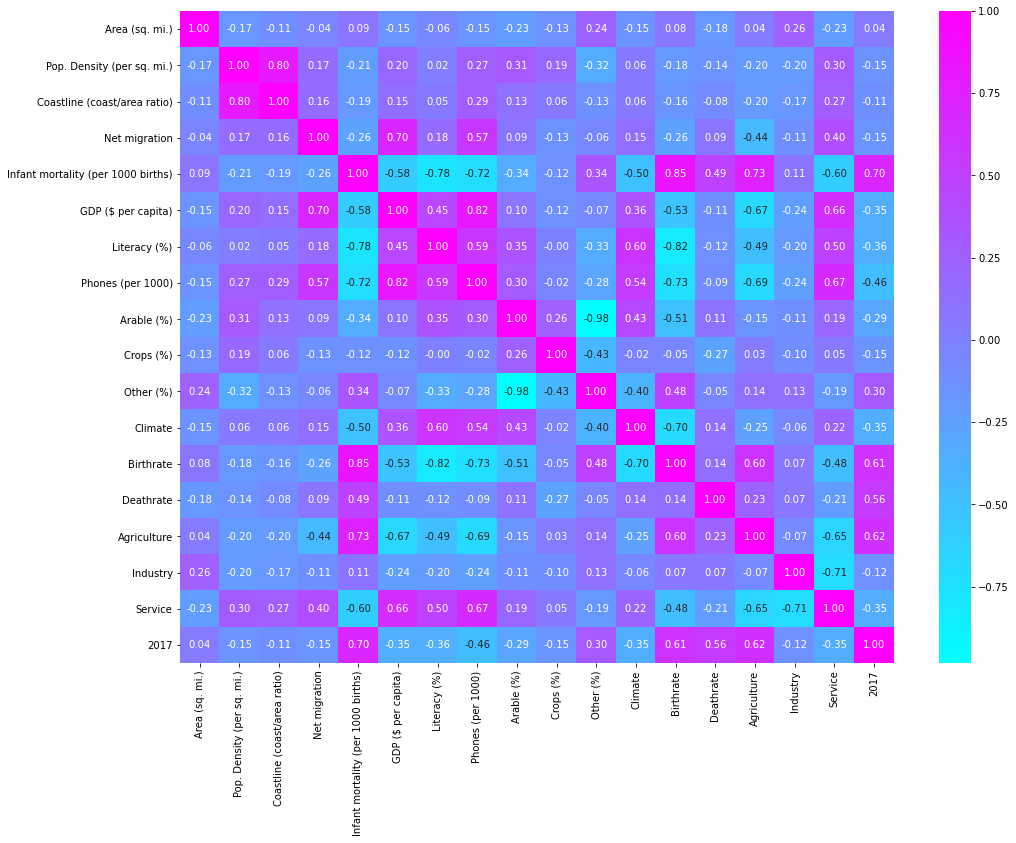

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df_copy.iloc[:,2:].corr(),annot=True,fmt='.2f', cmap="cool")
plt.show()

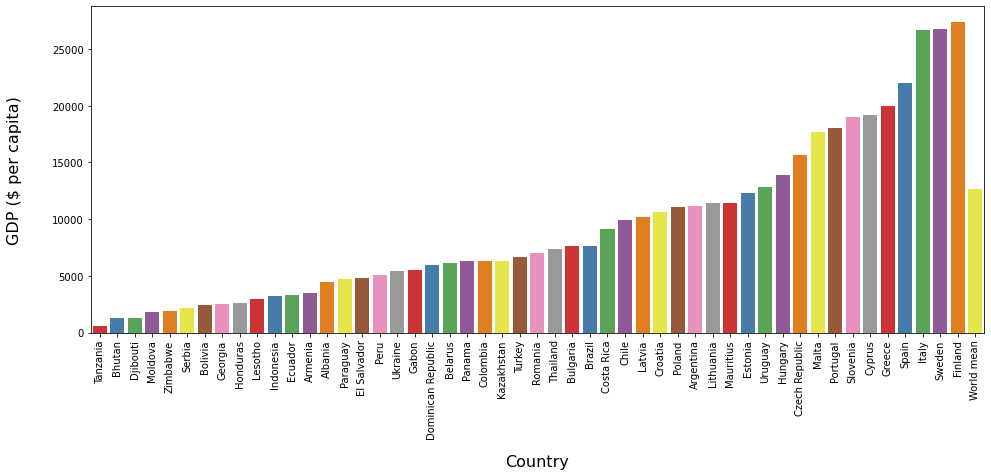

In [14]:
fig, ax = plt.subplots(figsize=(16,6))
df_copy['Country']=df_copy.index
top_lower_gdp_countries = df_copy.sort_values('GDP ($ per capita)',ascending=True).head(50)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[df_copy['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_lower_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)
sns.barplot(x='Country', y='GDP ($ per capita)', data=gdps, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

### modeling

In [15]:
labelEncoder = preprocessing.LabelEncoder()
columns = df_copy.select_dtypes(include=['object', 'category']).columns
print(columns)

# Drop the values we do not need
df_copy.drop('Indicator Name', 1)
df_copy.drop('Country Code', 1)
df_copy.drop('Area (sq. mi.)',1)
df_copy.drop('Pop. Density (per sq. mi.)',1)
df_copy.drop('Coastline (coast/area ratio)',1)
df_copy.drop('Net migration',1)
		

print("\n New columns", df_copy.select_dtypes(include=['object', 'category']).columns)

Index(['Region', 'Country Code', 'Indicator Name', 'Country'], dtype='object')

 New columns Index(['Region', 'Country Code', 'Indicator Name', 'Country'], dtype='object')


In [16]:
df_copy.head(2)
		

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),...,Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Country Code,Indicator Name,2017,Country
Country,,,,,,,,,,,,,,,,,,,,,
Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,3.0,15.11,5.22,0.232,0.188,0.579,ALB,Poverty headcount ratio at $1.90 a day (2011 P...,1.3,Albania
Argentina,LATIN AMER. & CARIB,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,...,3.0,16.73,7.55,0.095,0.358,0.547,ARG,Poverty headcount ratio at $1.90 a day (2011 P...,0.8,Argentina


In [17]:
# Create categorical columns
labelEncoder = preprocessing.LabelEncoder()
region_cat = labelEncoder.fit_transform(df_copy['Region'])
# Initialize columns
df_copy['region_cat'] = region_cat
# Dropping the old values
old = df_copy.select_dtypes(include=['object', 'category']).columns
df_copy = df_copy.drop(old, axis=1)
df_copy.head()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,2017,region_cat
Country,,,,,,,,,,,,,,,,,,,,
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,1.3,3
Argentina,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.73,7.55,0.095,0.358,0.547,0.8,4
Armenia,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418,0.9,2
Austria,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.74,9.76,0.018,0.304,0.678,0.3,7
Belarus,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591,0.0,2


## Multiple Linear Regression

In [18]:
df = df_copy
df = df.rename(columns={'2017': 'Poverty Index'})

In [19]:
info_table = pd.DataFrame(index=df_copy.columns)
info_table ['data_type'] = df_copy.dtypes
info_table ['null_count'] = df_copy.isnull().sum()
info_table

,data_type,null_count
Population,int64,0
Area (sq. mi.),int64,0
Pop. Density (per sq. mi.),float64,0
Coastline (coast/area ratio),float64,0
Net migration,float64,0
Infant mortality (per 1000 births),float64,0
GDP ($ per capita),float64,0
Literacy (%),float64,0
Phones (per 1000),float64,0
Arable (%),float64,0


### Splitting the data
Splitting the Data into two different sets, we’ll split the data into two datasets to a 7:3 ratio.


In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Scaling the data
It is important to re-scale the variables so that they all have a comparable scale. If we don’t have relative scales, then some of the regression model coefficients will be of different units compared to the other coefficients.
To do that, we use the MinMax scaling method.

In [21]:
df

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Poverty Index,region_cat
Country,,,,,,,,,,,,,,,,,,,,
Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.110,5.220,0.232,0.188,0.579,1.3,3
Argentina,39921833,2766890,14.4,0.18,0.61,15.18,11200.0,97.1,220.4,12.31,0.48,87.21,3.0,16.730,7.550,0.095,0.358,0.547,0.8,4
Armenia,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.070,8.230,0.239,0.343,0.418,0.9,2
Austria,8192880,83870,97.7,0.00,2.00,4.66,30000.0,98.0,452.2,16.91,0.86,82.23,3.0,8.740,9.760,0.018,0.304,0.678,0.3,7
Belarus,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.160,14.020,0.093,0.316,0.591,0.0,2
Belgium,10379067,30528,340.0,0.22,1.23,4.68,29100.0,98.0,462.6,23.28,0.40,76.32,3.0,10.380,10.270,0.010,0.240,0.749,0.1,7
Bhutan,2279723,47000,48.5,0.00,0.00,100.44,1300.0,42.2,14.3,3.09,0.43,96.48,2.0,33.650,12.700,0.258,0.379,0.363,1.5,0
Bolivia,8989046,1098580,8.2,0.00,-1.32,53.11,2400.0,87.2,71.9,2.67,0.19,97.14,1.5,23.300,7.530,0.128,0.352,0.520,5.8,4
Brazil,188078227,8511965,22.1,0.09,-0.03,29.61,7600.0,86.4,225.3,6.96,0.90,92.15,2.0,16.560,6.170,0.084,0.400,0.516,4.4,4


In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ["Population", "Area (sq. mi.)", "Pop. Density (per sq. mi.)", "Coastline (coast/area ratio)", "Net migration", "Infant mortality (per 1000 births)", "GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", "Climate", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service", "Poverty Index", "region_cat"]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

<ipython-input-22-16cb97f55542>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
/Users/amineboulouma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Poverty Index,region_cat
Country,,,,,,,,,,,,,,,,,,,,
Panama,0.011390,0.009150,0.028148,0.051060,0.607284,0.168059,0.153226,0.798913,0.197814,0.130319,0.207765,0.839045,0.333333,0.422590,0.074934,0.127098,0.000000,1.000000,0.050607,0.571429
Norway,0.017182,0.038005,0.007057,0.124759,0.817102,0.001293,1.000000,1.000000,0.676171,0.050383,0.000000,0.951021,0.666667,0.088932,0.342838,0.014388,0.594037,0.504673,0.006073,1.000000
Georgia,0.017389,0.008152,0.048842,0.007065,0.307205,0.149364,0.051075,0.972826,0.210666,0.202955,0.405037,0.735895,0.666667,0.054852,0.331565,0.376499,0.272936,0.478972,0.101215,0.285714
Portugal,0.041647,0.010818,0.086822,0.031150,0.961995,0.014718,0.467742,0.817935,0.583838,0.386505,0.819517,0.489097,0.666667,0.064914,0.415782,0.091127,0.270642,0.759346,0.008097,1.000000
Latvia,0.007649,0.007551,0.023708,0.013166,0.502771,0.059467,0.258065,0.994565,0.468902,0.527506,0.049318,0.479058,0.666667,0.016878,0.625332,0.059952,0.240826,0.820093,0.016194,0.142857


### Building a linear model
Before building the model, we need to divide the data into X and Y sets.


In [23]:
# Dividing the training data set into X and Y
y_train = df_train.pop('GDP ($ per capita)')
X_train = df_train

First, we’ll add the variables except for the target variable to the model.


In [24]:
#Build a linear model

import statsmodels.api as sm
X_train_lm_1 = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm_1).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     16.71
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           2.14e-08
Time:                        02:38:26   Log-Likelihood:                 51.977
No. Observations:                  40   AIC:                            -63.95
Df Residuals:                      20   BIC:                            -30.18
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                666.5399    607.729      1.097      0.286    -601.160    1934.240
Population                             0.3797      0.171      2.227      0.038       0.024       0.735
Area (sq. mi.)                        -0.2490      0.198     -1.255      0.224      -0.663       0.165
Pop. Density (per sq. mi.)            -0.3380      0.329     -1.028      0.316      -1.024       0.348
Coastline (coast/area ratio)           0.1919      0.286      0.670      0.510      -0.405       0.789
Net migration                          0.0707      0.112      0.632      0.535      -0.163       0.304
Infant mortality (per 1000 births)    -0.2497      0.299     -0.836      0.413      -0.873       0.374
Literacy (%)                           0.4031      0.208      1.935      0.067      -0.031       0.838
Phones (per 1000)                      0.3127      0.217      1.443      0.165      -0.139       0.765
Arable (%)                          -660.6147    598.734     -1.103      0.283   -1909.552     588.322
Crops (%)                           -112.2040    101.563     -1.105      0.282    -324.061      99.653
Other (%)                           -679.4283    615.893     -1.103      0.283   -1964.158     605.301
Climate                               -0.0589      0.130     -0.452      0.656      -0.331       0.213
Birthrate                             -0.0126      0.264     -0.048      0.962      -0.563       0.538
Deathrate                              0.1107      0.170      0.651      0.522      -0.244       0.465
Agriculture                           10.4821     25.431      0.412      0.685     -42.565      63.530
Industry                              11.4585     26.537      0.432      0.671     -43.896      66.813
Service                               11.1453     26.065      0.428      0.674     -43.225      65.515
Poverty Index                          0.3077      0.186      1.654      0.114      -0.080       0.696
region_cat                             0.4947      0.117      4.215      0.000       0.250       0.739
==============================================================================
Omnibus:                        0.221   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.895   Jarque-Bera (JB):                0.005
Skew:                           0.026   Prob(JB):                        0.998
Kurtosis:                       3.003   Cond. No.                     1.50e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

If we look at the ```p-values``` of some of the variables, the values seem to be pretty high, which means they aren’t significant. That means we can drop those variables from the model.

In [25]:
# Dropping insignificant variables
X = X_train.drop('Coastline (coast/area ratio)', 1,)
X = X.drop('Net migration', 1,)

# Build a fitted model after dropping the variable
X_train_lm_2 = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm_2).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     19.77
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.51e-09
Time:                        02:38:26   Log-Likelihood:                 51.262
No. Observations:                  40   AIC:                            -66.52
Df Residuals:                      22   BIC:                            -36.12
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

Let's now clean the new model based on the ```p-values```

In [26]:
# Dropping insignificant variables
X = X_train.drop('Coastline (coast/area ratio)', 1,)
X = X.drop('Net migration', 1,)
X = X.drop('Birthrate', 1,)
X = X.drop('Climate', 1,)

X_train_lm_3 = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     24.05
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           7.32e-11
Time:                        02:38:26   Log-Likelihood:                 50.952
No. Observations:                  40   AIC:                            -69.90
Df Residuals:                      24   BIC:                            -42.88
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [27]:
# Dropping insignificant variables
X = X_train.drop('Coastline (coast/area ratio)', 1,)
X = X.drop('Net migration', 1,)
X = X.drop('Arable (%)', 1,)
X = X.drop('Crops (%)', 1,)
X = X.drop('Other (%)', 1,)
X = X.drop('Birthrate', 1,)
X = X.drop('Climate', 1,)
X = X.drop('Agriculture', 1,)

X_train_lm_4 = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     27.71
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           3.75e-12
Time:                        02:38:26   Log-Likelihood:                 44.971
No. Observations:                  40   AIC:                            -65.94
Df Residuals:                      28   BIC:                            -45.68
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [28]:
# Dropping insignificant variables
X = X_train.drop('Coastline (coast/area ratio)', 1,)
X = X.drop('Net migration', 1,)
X = X.drop('Infant mortality (per 1000 births)', 1,)
X = X.drop('Arable (%)', 1,)
X = X.drop('Crops (%)', 1,)
X = X.drop('Other (%)', 1,)
X = X.drop('Birthrate', 1,)
X = X.drop('Climate', 1,)
X = X.drop('Deathrate', 1,)
X = X.drop('Agriculture', 1,)

X_train_lm_5 = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:     GDP ($ per capita)   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     36.27
Date:                Wed, 27 Jan 2021   Prob (F-statistic):           1.03e-13
Time:                        02:38:27   Log-Likelihood:                 44.962
No. Observations:                  40   AIC:                            -69.92
Df Residuals:                      30   BIC:                            -53.04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

Now, before making predictions, we have to see whether the error terms are normally distributed or not. We’ll do that by using Residual Analysis.

```Error-terms = y_actual - y_predicted```

The difference between the actual y-value and the predicted y-value using the model at that particular x-value is the error term.

### Residual Analysis of the train data

We have to check if the error terms are normally distributed (which is one of the major assumptions of linear regression); let us plot the error terms’ histogram.

/Users/amineboulouma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amineboulouma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/amineboulouma/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

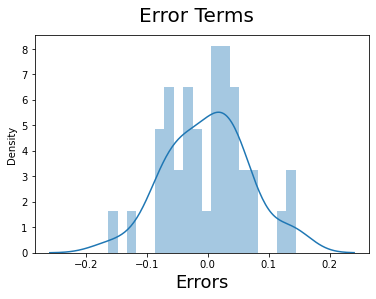

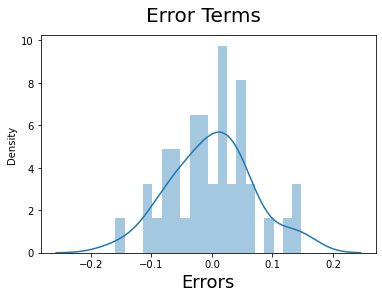

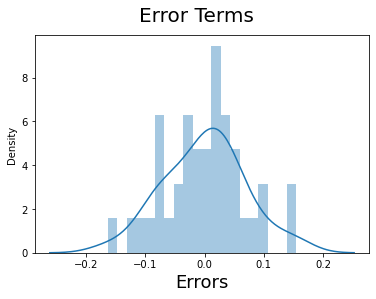

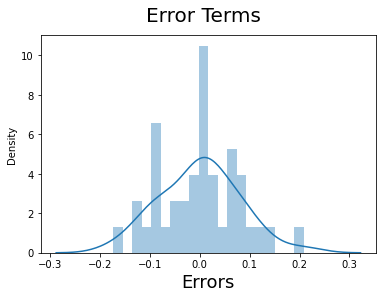

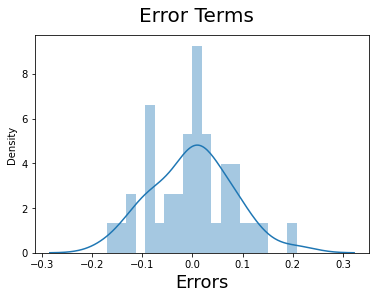

In [29]:
## import seaborn as sns

X_trains = [X_train_lm_1, X_train_lm_2, X_train_lm_3, X_train_lm_4, X_train_lm_5]
models = [lr_1, lr_2, lr_3, lr_4, lr_5]

for X_train_model in zip(X_trains, models):
    y_train_poverty_index = X_train_model[1].predict(X_train_model[0])
    # Plot the histogram of the error terms
    fig = plt.figure()
    sns.distplot((y_train - y_train_poverty_index), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                   
    plt.xlabel('Errors', fontsize = 18)  

As we can see, the error terms resemble closely to a normal distribution. So we can move ahead and make predictions using the model in the test dataset.

### Making Predictions Using the Final Model

We have fitted the model and checked the normality of error terms. Let’s make predictions using the final model.
Similar to the training dataset. First, we have to scale the test data.

In [30]:
num_vars = ["Population", "Area (sq. mi.)", "Pop. Density (per sq. mi.)", "Coastline (coast/area ratio)", "Net migration", "Infant mortality (per 1000 births)", "GDP ($ per capita)", "Literacy (%)", "Phones (per 1000)", "Arable (%)", "Crops (%)", "Other (%)", "Climate", "Birthrate", "Deathrate", "Agriculture", "Industry", "Service", "Poverty Index", "region_cat"]
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

df_test.head()

<ipython-input-30-696141fa0ad8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
/Users/amineboulouma/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Poverty Index,region_cat
Country,,,,,,,,,,,,,,,,,,,,
Greece,0.146035,0.101233,0.103689,1.000000,0.523741,0.028258,0.347584,0.956747,0.821179,0.353253,0.727197,0.576592,0.6,0.000000,0.241478,0.177419,0.265176,0.744467,0.026549,1.000000
Peru,0.397889,1.000000,0.003400,0.018322,0.279137,0.298659,0.070632,0.842561,0.093050,0.008888,0.032338,1.000000,0.0,0.450563,0.076797,0.282258,0.447284,0.577465,0.100295,0.571429
Lesotho,0.022132,0.022066,0.079211,0.000000,0.301439,0.834033,0.031599,0.737024,0.013415,0.159796,0.009950,0.877229,0.6,0.628703,1.000000,0.616935,1.000000,0.062374,0.820059,0.857143
Costa Rica,0.051485,0.038233,0.101649,0.243009,0.391367,0.073513,0.144981,0.930796,0.465820,0.037632,0.486733,0.888535,0.2,0.360451,0.000000,0.314516,0.539936,0.505030,0.032448,0.571429
Spain,0.570828,0.391794,0.101989,0.094503,0.425899,0.016894,0.384758,0.963668,0.626802,0.447239,0.817579,0.480096,0.6,0.015853,0.220123,0.120968,0.527157,0.607646,0.020649,1.000000


Dividing the test data into X and Y, after that, we’ll drop the unnecessary variables from the test data based on our model.

In [31]:
y_test = df_test.pop('GDP ($ per capita)')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m5 = sm.add_constant(X_test)

X_test_m5 = X_test_m5.drop('Coastline (coast/area ratio)', 1,)
X_test_m5 = X_test_m5.drop('Net migration', 1,)
X_test_m5 = X_test_m5.drop('Infant mortality (per 1000 births)', 1,)
X_test_m5 = X_test_m5.drop('Arable (%)', 1,)
X_test_m5 = X_test_m5.drop('Crops (%)', 1,)
X_test_m5 = X_test_m5.drop('Other (%)', 1,)
X_test_m5 = X_test_m5.drop('Birthrate', 1,)
X_test_m5 = X_test_m5.drop('Climate', 1,)
X_test_m5 = X_test_m5.drop('Deathrate', 1,)
X_test_m5 = X_test_m5.drop('Agriculture', 1,)

# Making predictions using the final model
y_pred_m5 = lr_5.predict(X_test_m5)

Now, we have to see if the final predicted model is best fitted or not. To do that, we’ll calculate the R² value for the expected test model.

We do that by importing the r2_score library from sklearn

In [32]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m5)

-0.7024780922770746

Since the R-squarred are different we will procede to check out the other models.

In [33]:
# Adding constant variable to test dataframe
X_test_m1 = sm.add_constant(X_test)
y_pred_m1 = lr_1.predict(X_test_m1)

In [34]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m1)

-23222.7484365253